In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

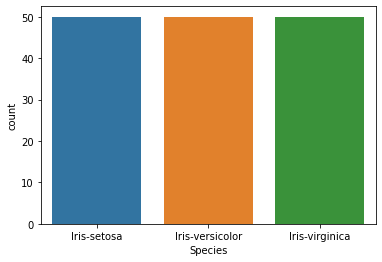

In [ ]:
sns.countplot(x='Species',data=data)
#plt.savefig('count sprecied in train data.png')

In [ ]:
species = {'Iris-setosa':1 , 'Iris-versicolor':2 , 'Iris-virginica':3}

In [ ]:
data = data.replace({'Species':species})

In [ ]:
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [ ]:
data.size

900

In [ ]:
len(data)

150

In [ ]:
len(data.columns)

6

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,2.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


In [ ]:
data.corr()[['Species']].sort_values(by='Species',ascending = False)

,Species
Species,1.000000
PetalWidthCm,0.956464
PetalLengthCm,0.949043
Id,0.942830
SepalLengthCm,0.782561
SepalWidthCm,-0.419446


In [ ]:
data.drop('Id',axis=1,inplace=True)

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
data.corr()[['Species']].sort_values(by='Species',ascending=False)

,Species
Species,1.000000
PetalWidthCm,0.956464
PetalLengthCm,0.949043
SepalLengthCm,0.782561
SepalWidthCm,-0.419446


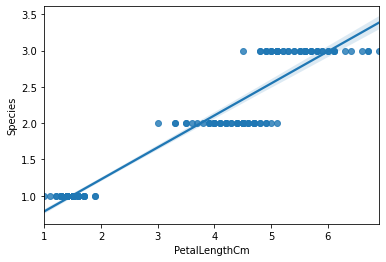

In [ ]:
sns.regplot(x='PetalLengthCm',y='Species',data=data)
plt.savefig('dependance of petal length of iris flowers on prediction.png')

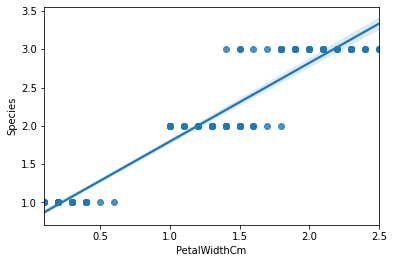

In [ ]:
sns.regplot(x='PetalWidthCm',y='Species',data=data)
plt.savefig('dependance of petal length of iris flowers on prediction.png')

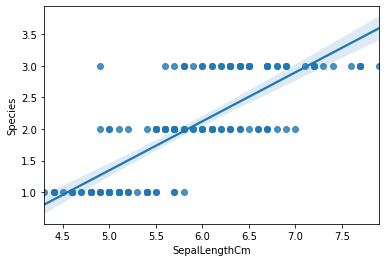

In [ ]:
sns.regplot(x='SepalLengthCm',y='Species',data=data)
plt.savefig('dependance of petal length of iris flowers on prediction.png')

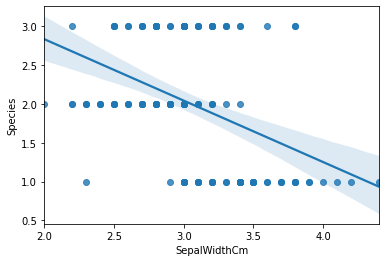

In [ ]:
sns.regplot(x='SepalWidthCm',y='Species',data=data)
plt.savefig('dependance of petal length of iris flowers on prediction.png')

In [ ]:
x_train=data.drop('Species',axis=1)
y_train=data[['Species']]

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x_train,y_train,test_size=0.2,random_state=18)

In [ ]:
x_train.shape

(120, 4)

In [ ]:
x_test.shape


(30, 4)

In [ ]:
y_train.shape

(120, 1)

In [ ]:
y_test.shape

(30, 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=112,max_iter=50)

In [ ]:
clf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=112, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict)*100)

[[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]
100.0


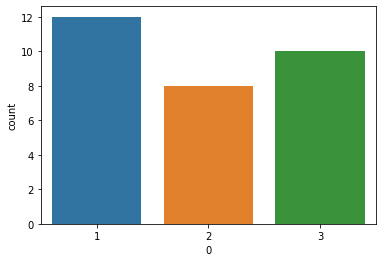

In [ ]:
y_predict=pd.DataFrame(y_predict)
sns.countplot(x=0,data=y_predict)
plt.savefig('y_predict data.png')

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
data.shape

(150, 5)

**Univariate Analysis**

In [ ]:
data.loc[data['Species']=='Iris-verginica']

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [ ]:
data_setosa = data.loc[data['Species']=='Iris-setosa']
data_virginica = data.loc[data['Species']=='Iris-verginica']
data_versicolor = data.loc[data['Species']=='Iris-versicolor']

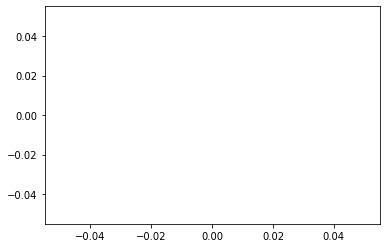

In [ ]:
plt.plot(data_setosa['SepalLengthCm'],np.zeros_like(data_setosa['SepalLengthCm']),'o')
plt.plot(data_virginica['SepalLengthCm'],np.zeros_like(data_virginica['SepalLengthCm']),'+')
plt.plot(data_versicolor['SepalLengthCm'],np.zeros_like(data_versicolor['SepalLengthCm']),'*')

**Bivariate Analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


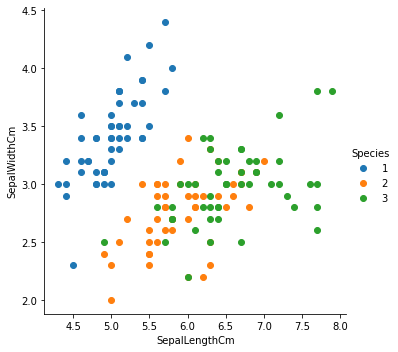

In [ ]:
sns.FacetGrid(data,hue='Species',size=5).map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

**Multivariate Analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


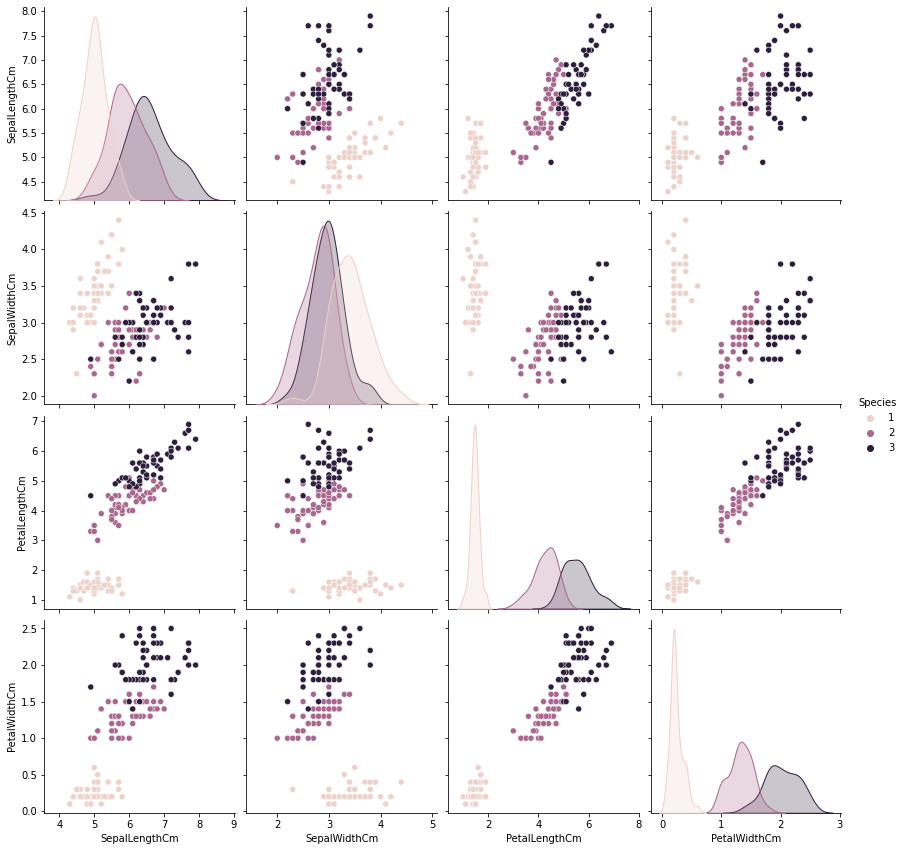

In [ ]:
sns.pairplot(data,hue='Species',size = 3)